In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [43]:
def parse_mesh(filename: str)-> float:
    img = Image.open(filename)
    arr = np.array(img)
    arr = arr.sum(axis=-1) // 3
    hist = np.histogram(arr, bins=256)[0]
    plt.bar(range(256), hist)
    hist[hist == 0] = sum(hist)/len(hist)
    mi = 40 + np.argmin(hist[40:100])
    print("split num", mi)
    arr_b = arr < mi

    c = np.sum(arr_b == False) / (arr_b.shape[0]*arr_b.shape[1])
    print("whole pic:", c)
    for i in range(100000):
        x,y = np.random.randint(0, arr.shape[0]), np.random.randint(0, arr.shape[1])
        size = np.random.randint(100, 600)
        xf = x+size if x+size < arr.shape[0] else arr.shape[0]
        yf = y+size if y+size < arr.shape[1] else arr.shape[1]
        piece = arr_b[x:xf, y:yf]
        c = (c + np.sum(piece == False) / (piece.shape[0]*piece.shape[1])) / 2
    print("average", c)
    return c

average 0.5004075656123224
90
whole pic: 0.49758544921875
average 0.48307570365704755
90
whole pic: 0.49758544921875
average 0.49065478087921977
90
whole pic: 0.49758544921875
average 0.5013655056128926
90
whole pic: 0.49758544921875
average 0.49705919887106365


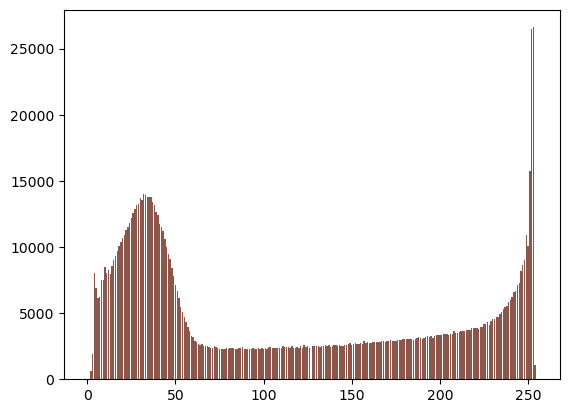

split num 72
whole pic: 0.49541003165977887
average 0.4879410211030677
split num 48
whole pic: 0.5756289103232534
average 0.5781552215964725
split num 47
whole pic: 0.567783279675252
average 0.5591023295477517
split num 90
whole pic: 0.49758544921875
average 0.4843037627924255
split num 56
whole pic: 0.5346525065104166
average 0.5174826383218352
split num 63
whole pic: 0.5275667317708334
average 0.5190820254677345


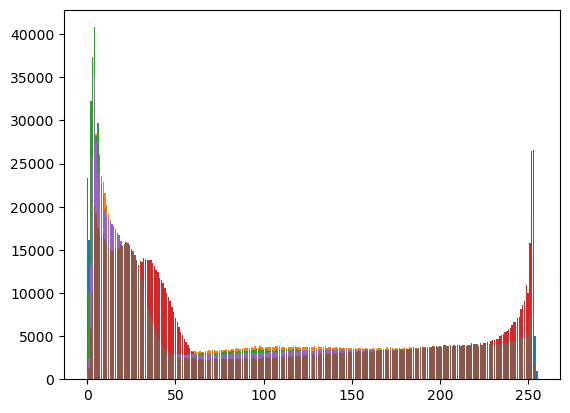

In [44]:
for nu in range(2, 8):
    parse_mesh(f"meshes_pics/mesh{nu}.jpg")

In [59]:
L = 0.005
d_h = 0.3
cond = L/d_h
porousity = 0.4843037627924255 #0.3174603175 #percentage of free surface area
alpha = 0.611 if porousity<0.1 else 0.6+0.4*porousity**2

In [60]:
f = ((1/alpha - porousity)**2 if cond<1.5 else (1/alpha-1)**2+(1-porousity)^2)/(porousity**2*L)

In [61]:
f

780.9280986929942

In [28]:
img = Image.open("meshes_pics/mesh5.jpg",)
arr = np.array(img)


In [29]:
print(arr.shape)

(1280, 960, 3)


In [30]:
arr = arr.sum(axis=-1) // 3

<BarContainer object of 256 artists>

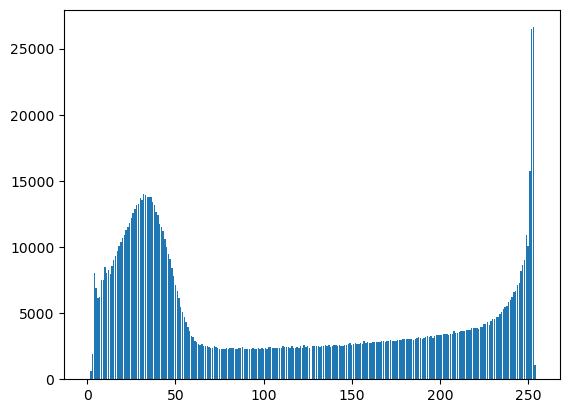

In [31]:
plt.bar(range(256), np.histogram(arr, bins=256)[0])

In [32]:
hist = np.histogram(arr, bins=256)[0]

In [33]:
hist[hist == 0] = sum(hist)/len(hist)

In [34]:
mi = 40 + np.argmin(hist[40:100])
mi

90

In [35]:
arr_b = arr < mi

In [36]:
np.sum(arr_b == False) / (arr_b.shape[0]*arr_b.shape[1])

0.49758544921875

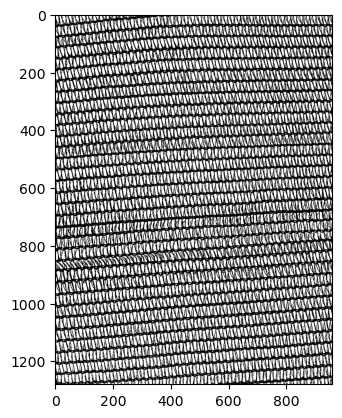

In [37]:
plt.imshow(arr_b, cmap="gray")

In [38]:
c = np.sum(arr_b == False) / (arr_b.shape[0]*arr_b.shape[1])
for i in range(100000):
    x,y = np.random.randint(0, arr.shape[0]), np.random.randint(0, arr.shape[1])
    size = np.random.randint(100, 600)
    xf = x+size if x+size < arr.shape[0] else arr.shape[0]
    yf = y+size if y+size < arr.shape[1] else arr.shape[1]
    piece = arr_b[x:xf, y:yf]
    c = (c + np.sum(piece == False) / (piece.shape[0]*piece.shape[1])) / 2

In [39]:
c

0.5089119707761581